# Optimal Chinese Restaurant Location

## Abstract

* Investors have a promising future in investment of Chinese restaurant at the City of Vancouver
* Location, census data, Foursquare API and machine learning were used to assess the optimal restaurant location
* Victoria-Fraserview can be the optimal location because of its low competition level
* Future study could incorporate more factors such as transportation into the analysis

## Introduction

Vancouver has one of the highest concentrations of Chinese people outside the continent of Asia. Chinese account for nearly 28% of the population (Statistics Canada, 2011), which leads to emerging Chinese restaurants over the past decade. The number of Chinese population in Vancouver is likely to continue to grow at a faster rate than the non-Chinese population (Statistics Canada, 2016). An accelerating rise of Chinese restaurants can be expected. Now is a good time for investors to open a Chinese restaurant, the real problem is what is the optimal location?  
Location is important for the success of restaurant because it affects the cost and competition. Locations with high density of population but low density of restaurants in the vicinity are likely to attract more customers. Most restaurant location selection analyses in Vancouver cover rent cost, yet very few address or seriously recognize competition. To address these knowledge gaps, I conducted an assessment of Chinese population and restaurant distribution across the City of Vancouver. Local areas were then segmented and clustered accordingly. I assumed major customers of Chinese restaurants were Chinese. I posed three questions:  
* How was Chinese population distributed in the City of Vancouver?
* How were Chinese restaurants distributed in the City of Vancouver?
* Which local area in the City of Vancouver should the investor open a Chinese restaurant? 

This study was aimed at providing location insights for investors interested in opening a Chinese restaurant in the City of Vancouver.

## Data

### Local Area Boundary
Local Area Boundary (City of Vancouver, 2019) contains the polygons for the city’s 22 local areas (also known as local planning areas). These boundaries generally follow street centerlines.

In [1]:
import requests
import urllib
from zipfile import ZipFile

In [2]:
# get vancouver boundary shapefile
url = 'ftp://webftp.vancouver.ca/OpenData/shape/local_area_boundary_shp.zip'
response = urllib.request.urlretrieve(url, 'boundary.zip')
with ZipFile('boundary.zip', 'r') as boundary: 
    # print all the contents of the zip file 
    boundary.printdir() 
    
    # extract all files 
    boundary.extractall() 
    print('All files were extracted.') 

File Name                                             Modified             Size
local_area_boundary.dbf                        2019-02-03 02:19:00         6148
local_area_boundary.prj                        2019-02-03 02:19:00          413
local_area_boundary.shp                        2019-02-03 02:19:00        20772
local_area_boundary.shx                        2019-02-03 02:19:00          276
All files were extracted.


In [3]:
import geopandas
import pyepsg

In [4]:
shp = geopandas.GeoDataFrame.from_file('local_area_boundary.shp')
# check current coordinate system
pyepsg.get(shp.crs['init'].split(':')[1])

<ProjectedCRS: 26910, NAD83 / UTM zone 10N>

In [5]:
# make coordinate system consistent
new_shp = shp.to_crs(epsg='4326')
# transfer shp to json
van_json = new_shp.to_json()
van_json

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"MAPID": "SUN", "NAME": "Sunset"}, "geometry": {"type": "Polygon", "coordinates": [[[-123.10696411132812, 49.204158782959226], [-123.10616302490234, 49.21887588500999], [-123.10562133789061, 49.233116149902564], [-123.09053802490233, 49.23282241821311], [-123.07703399658203, 49.23266601562523], [-123.07742309570314, 49.219970703125234], [-123.07701110839844, 49.219184875488516], [-123.0771484375, 49.20761489868186], [-123.07750701904297, 49.20756149292015], [-123.07786560058592, 49.20749664306663], [-123.07821655273438, 49.20742034912134], [-123.0785598754883, 49.207332611084226], [-123.07889556884766, 49.207233428955305], [-123.0792236328125, 49.207122802734595], [-123.07995605468751, 49.20687484741234], [-123.08071899414062, 49.20666122436546], [-123.08149719238281, 49.20647811889671], [-123.08839416503908, 49.20477676391624], [-123.08956146240234, 49.20444488525413], [-123.08972930908203, 49.20

In [6]:
# get centroid of each polygon
cpoint = shp['geometry'].centroid
# make coordinate system consistent and transfer to json
cjson = cpoint.to_crs(epsg='4326').to_json()

In [7]:
import json
import pandas as pd

In [8]:
van_data = json.loads(cjson)
van_data = van_data['features']

In [9]:
van_data

[{'id': '0',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.0920382187122, 49.21875524075676]},
  'bbox': [-123.0920382187122,
   49.21875524075676,
   -123.0920382187122,
   49.21875524075676]},
 {'id': '1',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.09851250389197, 49.26306545462446]},
  'bbox': [-123.09851250389197,
   49.26306545462446,
   -123.09851250389197,
   49.26306545462446]},
 {'id': '2',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.10314689371549, 49.24476610864839]},
  'bbox': [-123.10314689371549,
   49.24476610864839,
   -123.10314689371549,
   49.24476610864839]},
 {'id': '3',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Point',
   'coordinates': [-123.1165669909403, 49.28074666385142]},
  'bbox': [-123.1165669909403,
   49.28074666385142,
   -123.1165669909403,
   49.28074666385142]},
 {'id': '4

In [10]:
column_names = ['Latitude', 'Longitude'] 

# instantiate the dataframe
cloc = pd.DataFrame(columns=column_names)

In [11]:
# get latitude and longitude of each centroid
for data in van_data:
    cloc_latlon = data['geometry']['coordinates']
    cloc_lat = cloc_latlon[1]
    cloc_lon = cloc_latlon[0]
    cloc = cloc.append({'Latitude': cloc_lat,'Longitude': cloc_lon}, ignore_index=True)

In [12]:
cloc.head()

,Latitude,Longitude
0,49.218755,-123.092038
1,49.263065,-123.098513
2,49.244766,-123.103147
3,49.280747,-123.116567
4,49.267540,-123.163295


In [13]:
# get shape area
shp['AREA'] = shp.area/10**6

In [14]:
dict = {'Local Area':shp['NAME'], 
                'Latitude':cloc['Latitude'], 
                'Longitude':cloc['Longitude'], 
                'Area':shp['AREA']}

# instantiate the dataframe
neighborhood = pd.DataFrame(dict)

In [15]:
neighborhood.head()

,Local Area,Latitude,Longitude,Area
0,Sunset,49.218755,-123.092038,6.575731
1,Mount Pleasant,49.263065,-123.098513,3.720549
2,Riley Park,49.244766,-123.103147,4.931676
3,Downtown,49.280747,-123.116567,4.674227
4,Kitsilano,49.267540,-123.163295,6.362855


In [16]:
from geopy.geocoders import Nominatim
import folium

In [17]:
# geocoding vancouver
address = 'Vancouver, British Columbia'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [18]:
# generate map centred around vancouver
van_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')
# map local area boundary
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(van_map)
# map centroid
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'Local Area: {nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  

van_map

### 2016 Census of Population
The 2016 Census (Statistics Canada, 2016) provides statistical information about the population. Visible minority for the population in private households was used to assess the number of Chinese population in each of the city's 22 Local Areas. Visible minorities refer to persons, other than Aboriginal peoples, who are non-Caucasian in race or non-white in color. The visible minority population consists many groups such as Chinese, Black, Latin American and Arab.  

In [19]:
url = 'ftp://webftp.vancouver.ca/opendata/xls/CensusLocalAreaProfiles2016.csv'

In [20]:
#census = urllib.request.urlretrieve(url, 'CensusLocalAreaProfiles2016.csv')
# read cnesus data
census = pd.read_csv('CensusLocalAreaProfiles2016.csv',encoding = "ISO-8859-1") 
# Preview the first 5 lines of the loaded data 
census.head()

,The data shown here is provided by Statistics Canada from the 2016 Census as a custom data order for the City of Vancouver using the City's 22 local planning areas,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,The data may be reproduced provided they are c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CENSUS DATA FOR CITY OF VANCOUVER LOCAL AREAS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
4,1,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975",...,"22,555","8,430","7,970","12,585","36,500","31,065","47,200","13,065","631,485","2,463,430"


In [21]:
# get and clean local area names
census.columns = census.iloc[3, :].str.rstrip()

In [22]:
# remove useless data
census.drop(['ID'], axis=1, inplace=True)
census.drop(['Vancouver CSD', 'Vancouver CMA'], axis=1, inplace=True)
census.drop(census.index[0:4], axis=0, inplace=True)

In [23]:
del census.columns.name
census.reset_index(drop=True, inplace=True)

In [24]:
census.head()

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
0,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975","29,325",...,"13,030","51,530","22,555","8,430","7,970","12,585","36,500","31,065","47,200","13,065"
1,0 to 14 years,2015,4000,3545,2580,3210,4595,7060,1880,4185,...,1565,6305,3415,1175,1105,1065,5460,3790,1945,1900
2,0 to 4 years,455,2080,675,1240,1320,1510,2515,430,1300,...,490,2065,1175,270,360,360,1695,1175,965,420
3,5 to 9 years,685,1105,1225,760,1025,1560,2390,600,1400,...,480,2115,1160,405,365,365,1780,1210,560,670
4,10 to 14 years,880,810,1650,580,865,1525,2160,845,1485,...,590,2130,1080,500,375,340,1985,1410,415,810


In [25]:
# transpose table
tcensus = census.transpose()
tcensus.columns = tcensus.iloc[0,:].str.lstrip()

In [26]:
# get chinese population
tcensus = tcensus['Chinese'].iloc[1:,0]

In [27]:
# clean census data
census_df = tcensus.to_frame().reset_index()
census_df.rename(columns={'index':'Local Area'}, inplace=True)

In [28]:
census_df.head()

,Local Area,Chinese
0,Arbutus-Ridge,6970
1,Downtown,9490
2,Dunbar-Southlands,6525
3,Fairview,3865
4,Grandview-Woodland,3885


### Foursquare API
Foursquare builds a massive dataset of location data. Using Foursquare API and centroid coordinates, I can acquire spatial and detailed information (e.g. venue category) of venues in each local area (Foursquare, 2019). Chinese restaurants including dim sum restaurants, Shanghai restaurants, Taiwan restaurants, etc. can be extracted. Foursquare API also allows me to get rating (0-10) for each restaurant, which is helpful to evaluate quality of restaurants in each local area.

In [29]:
# foursquare information
CLIENT_ID = 'CMGOG4ZRSMWXCBOJ5L1ERRLDS0KBNCDZB5YIQUBYV0RSFESM' # foursquare id
CLIENT_SECRET = 'WSNVRUT4NVSFXME5VVG3XQIIVFKJWLC5PVI5OFWNFCJ1NZ5Z' # foursquare secret
VERSION = '20190518' # foursquare api version
category_id = '4bf58dd8d48988d145941735' # chinese restaurant category id

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CMGOG4ZRSMWXCBOJ5L1ERRLDS0KBNCDZB5YIQUBYV0RSFESM
CLIENT_SECRET:WSNVRUT4NVSFXME5VVG3XQIIVFKJWLC5PVI5OFWNFCJ1NZ5Z


In [30]:
# create function to get nearby chinese restaurants
def getNearbyCR(names, latitudes, longitudes, radius=1500, LIMIT=100):
    
    cr_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the api request url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            lat, 
            lng,
            VERSION,  
            category_id,
            radius, 
            LIMIT)
            
        # make the get request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby chinese restaurant
        cr_list.append([(
            name, 
            lat, 
            lng, 
            cr['name'], 
            cr['id'],
            cr['location']['lat'], 
            cr['location']['lng'],  
            cr['categories'][0]['name']) for cr in results])

    nearby_cr = pd.DataFrame([item for cr_list in cr_list for item in cr_list])
    nearby_cr.columns = ['Local Area',                   
                  'Centroid Latitude', 
                  'Centroid Longitude', 
                  'Venue',
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_cr)

In [31]:
# get nearby chinese restaurants
van_cr = getNearbyCR(names=neighborhood['Local Area'],
                     latitudes=neighborhood['Latitude'],
                     longitudes=neighborhood['Longitude'])

Sunset
Mount Pleasant
Riley Park
Downtown
Kitsilano
Dunbar-Southlands
Kerrisdale
Arbutus-Ridge
West Point Grey
Marpole
Oakridge
Shaughnessy
Fairview
South Cambie
West End
Killarney
Renfrew-Collingwood
Hastings-Sunrise
Victoria-Fraserview
Kensington-Cedar Cottage
Strathcona
Grandview-Woodland


In [32]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant


In [33]:
# check if wrong subcategory were included in Chinese restaurant
van_cr['Venue Category'].unique()

array(['Chinese Restaurant', 'Cantonese Restaurant', 'Dim Sum Restaurant',
       'Noodle House', 'Diner', 'Taiwanese Restaurant',
       'Asian Restaurant', 'Tea Room', 'Hotpot Restaurant',
       'Shanghai Restaurant', 'Szechuan Restaurant', 'Café',
       'Korean Restaurant', 'Peking Duck Restaurant', 'Creperie',
       'Bubble Tea Shop', 'Donut Shop', 'Bakery', 'Arts & Crafts Store',
       'Fast Food Restaurant'], dtype=object)

In [34]:
# check venue name of the wrong subcategory
van_cr.loc[van_cr['Venue Category']=='Arts & Crafts Store', ['Venue','Venue Category']]

,Venue,Venue Category
517,Bamboo Village,Arts & Crafts Store


In [35]:
# delete the wrong venue
van_cr.drop(517, axis=0, inplace=True)

In [36]:
van_cr.reset_index(drop=True)

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant
5,Sunset,49.218755,-123.092038,Neptune Chinese Kitchen,5b6659bb5a2c91002c139a9a,49.210604,-123.092673,Cantonese Restaurant
6,Sunset,49.218755,-123.092038,Lian Hong Chinese Food & Bakery,4dc6caa9d4c0ad9c0fa94bd3,49.226530,-123.090620,Dim Sum Restaurant
7,Sunset,49.218755,-123.092038,Ho Yuen Kee Restaurant,4af780a3f964a5209f0922e3,49.227979,-123.090478,Chinese Restaurant
8,Sunset,49.218755,-123.092038,冠樂,4e5709ad7d8b7535133aa568,49.227786,-123.090359,Chinese Restaurant
9,Sunset,49.218755,-123.092038,A2 Cafe,547b7115498ea9baa90b4530,49.230488,-123.090721,Chinese Restaurant


In [37]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant


In [38]:
# create function to get ratings of chinese restaurants
def getCRating(cr_ids):
    
    cr_rating=[]
    for venue_id in cr_ids:
            
        # create the api request url
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION)
            
        try:
            # make the get request
            results = requests.get(url).json()['response']['venue']['rating']
            # return id and rating for each chinese restaurant
            cr_rating.append([venue_id, results])
        except:
            cr_rating.append([venue_id, 'NaN'])
        
    rating = pd.DataFrame(cr_rating)
    rating.columns = ['Venue ID', 'Venue Rating']
    
    return(rating)

In [39]:
# get ratings
rating_cr = getCRating(cr_ids=van_cr['Venue ID'])

In [40]:
rating_cr.head()

,Venue ID,Venue Rating
0,5158fe65e4b06ee01ae984c9,6.1
1,55039916498ee7519a7e1bf9,7.3
2,5075d46ee4b0c63048e3740e,7.9
3,56188f36498ef927d657b7bc,NaN
4,4ce7207c9f776ea8ab055622,NaN


## Methodology

### Exploratory Data Analysis

Centroid as the arithmetic mean position of the polygon was derived from Local Area Boundary data for searching nearby Chinese restaurants (Fig. 1). To get the density of Chinese population, shape area of each local area was calculated. The density of Chinese population in each local area were calculated using the equation: $$density = \frac{number}{shape\, {area}}$$ To get the number of Chinese restaurants in each local area, I searched Chinese restaurants (id: 4bf58dd8d48988d145941735) specifically. Radius was set to 1500 m to cover most area of each local area. The density of Chinese restaurants in each local area can then be calculated using the equation: $$density=\frac{number}{\pi{r^2}}$$
After checking venue's unique category, I found one venue called "Bamboo Village" misclassified into the Chinese restaurant category. I deleted it from our analysis because it is an arts and crafts store. In total, 531 Chinese restaurants were found within 1500 m distance from the centroid of each local area (Fig. 2). Ratings were missing in West Point Grey due to lack of Chinese restaurants. Nearly 64% of Chinese restaurants do not have a rating (Fig. 3). Ratings are unavailable for all Chinese restaurants in Grandview-Woodland and Dunbar-Southlands local area. The distribution of available ratings varies across each local area (Fig. 4). Considering that missing values accounted for a large portion of data, ratings were not included in the cluster analysis and were only used to help me understand each local area in the study.  

In [41]:
# generate map centred around vancouver
cr_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) 

# add local area boundary
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(cr_map)

# add chinese restaurants as circle markers
for lat, lng, label in zip(van_cr['Venue Latitude'],van_cr['Venue Longitude'], van_cr['Venue']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#FC8D62',
        popup=label,
        fill = True,
        fill_color='#FC8D62',
        fill_opacity=0.5
    ).add_to(cr_map)

# add centroid
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'{nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(cr_map) 

# add legend
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 90px; 
                            border:none; z-index:9999; font-size:14px;
                            ">&nbsp; <i class="fa fa-circle fa-1x" style="color: #66C2A5"></i> Local Area &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #FC8D62"></i> Chinese Restaurant &nbsp 
                </div>
                ''' 
cr_map.get_root().html.add_child(folium.Element(legend_html))

# display map
cr_map

In [42]:
# join local area boundary df and census df
cleaned_neighborhood = pd.merge(neighborhood, census_df, on='Local Area')

In [43]:
# correct chinese data type to int
cleaned_neighborhood['Chinese'] = cleaned_neighborhood['Chinese'].astype('int')
# get density of chinese population
cleaned_neighborhood['Density_Chinese'] = cleaned_neighborhood['Chinese']/cleaned_neighborhood['Area']

In [44]:
cleaned_neighborhood.head()

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185


In [45]:
# add rating to original df
van_cr['Rating'] = rating_cr['Venue Rating']

In [46]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Rating
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant,NaN


In [47]:
# generate map centred around vancouver
rating_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) 

# add boundary to represent local area
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_color='#f2f2f2').add_to(rating_map)

  
# add chinese restaurants with rating as circle markers
for lat, lng, label in zip(van_cr.loc[van_cr['Rating']!='NaN', 'Venue Latitude'],
                           van_cr.loc[van_cr['Rating']!='NaN', 'Venue Longitude'],
                           van_cr.loc[van_cr['Rating']!='NaN', 'Rating']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#FC8D62',
        fill = True,
        fill_color='#FC8D62',
        fill_opacity=0.5
    ).add_to(rating_map)
    
# add chinese restaurants without rating as circle markers  
for lat, lng, label in zip(van_cr.loc[van_cr['Rating']=='NaN', 'Venue Latitude'],
                           van_cr.loc[van_cr['Rating']=='NaN', 'Venue Longitude'], 
                           van_cr.loc[van_cr['Rating']=='NaN', 'Rating']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='#a8a8a8',
        fill = True,
        fill_color='#a8a8a8',
        fill_opacity=0.5
    ).add_to(rating_map)

# add centroid    
for lat, lng, nei in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Local Area']):
    label = f'{nei}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#66C2A5',
        fill=True,
        fill_color='#66C2A5',
        fill_opacity=0.7,
        parse_html=False).add_to(rating_map)  

# add legend
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 90px; 
                            border:none; z-index:9999; font-size:14px;
                            ">&nbsp; <i class="fa fa-circle fa-1x" style="color: #66C2A5"></i> Local Area &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #FC8D62"></i> Rating &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #a8a8a8"></i> No Rating &nbsp
                </div>
                ''' 
rating_map.get_root().html.add_child(folium.Element(legend_html))

# display map
rating_map

In [48]:
# number of missing rating
num_na = rating_cr.loc[rating_cr['Venue Rating']=='NaN', 'Venue Rating'].count()
num_na

338

In [49]:
# calculate proportion of missing rating 
num_na/rating_cr['Venue Rating'].count()

0.6377358490566037

In [50]:
# change data to float
van_cr['Rating'] = van_cr['Rating'].astype('float')

In [51]:
avg_rating = van_cr[['Local Area','Rating']].groupby('Local Area').mean()
avg_rating = avg_rating.reset_index()
avg_rating.head()

,Local Area,Rating
0,Arbutus-Ridge,6.800000
1,Downtown,6.803333
2,Dunbar-Southlands,NaN
3,Fairview,6.455000
4,Grandview-Woodland,NaN


In [52]:
# get median rating for each local area
med_rating = van_cr[['Local Area','Rating']].groupby('Local Area').median()
med_rating = med_rating.reset_index()
med_rating.head()

,Local Area,Rating
0,Arbutus-Ridge,6.45
1,Downtown,6.55
2,Dunbar-Southlands,NaN
3,Fairview,6.25
4,Grandview-Woodland,NaN


In [53]:
# order local area by median rating
ordered_mrating = med_rating.sort_values(by='Rating', ascending=False)
ordered_mrating.reset_index(drop=True)
ordered_mrating.head()

,Local Area,Rating
19,Victoria-Fraserview,7.70
11,Mount Pleasant,6.95
18,Sunset,6.90
17,Strathcona,6.85
6,Kensington-Cedar Cottage,6.80


In [54]:
# order neighborhood by number of ratings 
num_rating = van_cr[['Local Area','Rating']].groupby('Local Area').count()
num_rating = num_rating.reset_index()
ordered_nr = num_rating.sort_values(by='Rating', ascending=False)
ordered_nr.head()

,Local Area,Rating
1,Downtown,30
20,West End,20
3,Fairview,20
6,Kensington-Cedar Cottage,19
11,Mount Pleasant,18


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

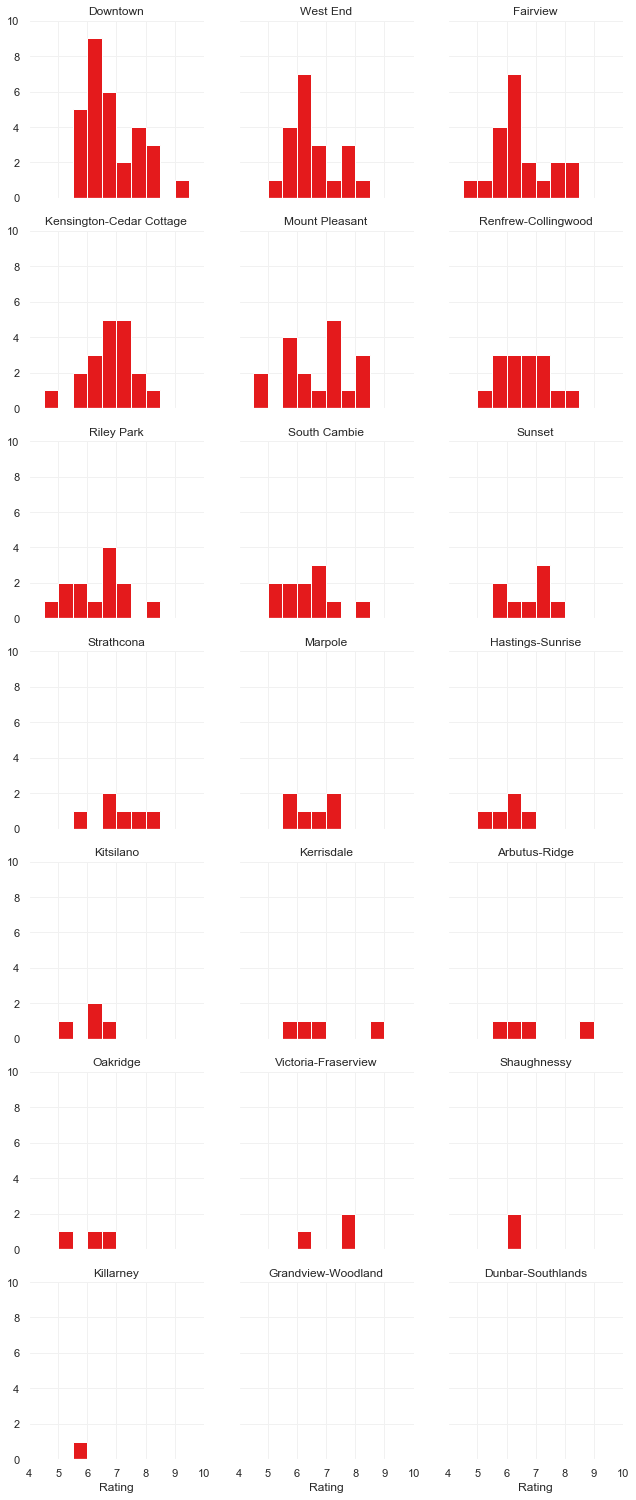

In [57]:
# histogram of rating
sns.set()
plt.rcParams['grid.color']='#f1f1f1'
plt.rcParams['axes.facecolor']='white'
h = sns.FacetGrid(van_cr, col='Local Area',col_wrap=3, xlim=(4,10), ylim=(0,10), col_order=ordered_nr['Local Area'])
h = h.set(xticks=np.arange(4,11,1))
h = h.map(plt.hist, 'Rating', color='#E41A1C',bins=np.arange(4, 11,0.5), edgecolor="white")
h = h.set_axis_labels('Rating', '')
h = h.set_titles('{col_name}')

plt.savefig('rating-hist.png', dpi=300, bbox_inches='tight')

## Results

### Distribution of Chinese Population

Chinese population was concentrated near the East side of the City of Vancouver (Fig. 5). Victoria-Fraserview was the local area with the highest density of Chinese population (2856 per km^2), followed by Renfrew-Collingwood (2638 per km^2) and Kensington-Cedar Cottage (2145 per km^2) (Fig. 6).

In [58]:
# generate map centred around vancouver
pop_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')

# map distribution of chinese population
folium.Choropleth(geo_data=van_json,
                data=cleaned_neighborhood,
                columns=['Local Area', 'Density_Chinese'],
                key_on='feature.properties.NAME',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_color='#a8a8a8',
                legend_name='Density of Chinese Population (#/km2)').add_to(pop_map) 

# display map
pop_map

### Distribution of Chinese Restaurants

North-central part of the City of Vancouver was the hotspot of Chinese restaurants (Fig. 7). West End (7.1 per km^2), Downtown (7.1 per km^2), and Fairview (6.9 per km^2) were the top 3 local areas with the highest density of Chinese restaurants (Fig. 8).

In [59]:
# get heat data for heat map
heat_data = [[row['Venue Latitude'],row['Venue Longitude']] for index, row in van_cr.iterrows()]

In [60]:
from folium import plugins
from folium.plugins import HeatMap

In [61]:
# generate map centred around vancouver
heat_map = folium.Map([latitude, longitude],
                  zoom_start=12,
                  tiles='cartodbpositron')

# heat map for chinese restaurants
HeatMap(heat_data,
       radius=25).add_to(heat_map)

# display map
heat_map

In [62]:
van_cr.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Rating
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant,NaN


In [63]:
import math

In [64]:
# get density of chinese restaurants
density_cr = van_cr.groupby('Local Area').count()/(math.pi*1500**2/10**6)
density_cr = density_cr[['Venue']].reset_index()
density_cr.rename(columns={'Venue':'Density_CR'}, inplace=True)
summary = cleaned_neighborhood.merge(density_cr, how='outer', on='Local Area')
summary.fillna(0,inplace=True)

In [65]:
# join ratings to summary df
summary = summary.merge(avg_rating, how='outer', on='Local Area')
summary.head()

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese,Density_CR,Rating
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169,2.829421,6.737500
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642,5.517371,6.672222
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881,4.951487,6.400000
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296,7.073553,6.803333
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185,2.546479,6.075000


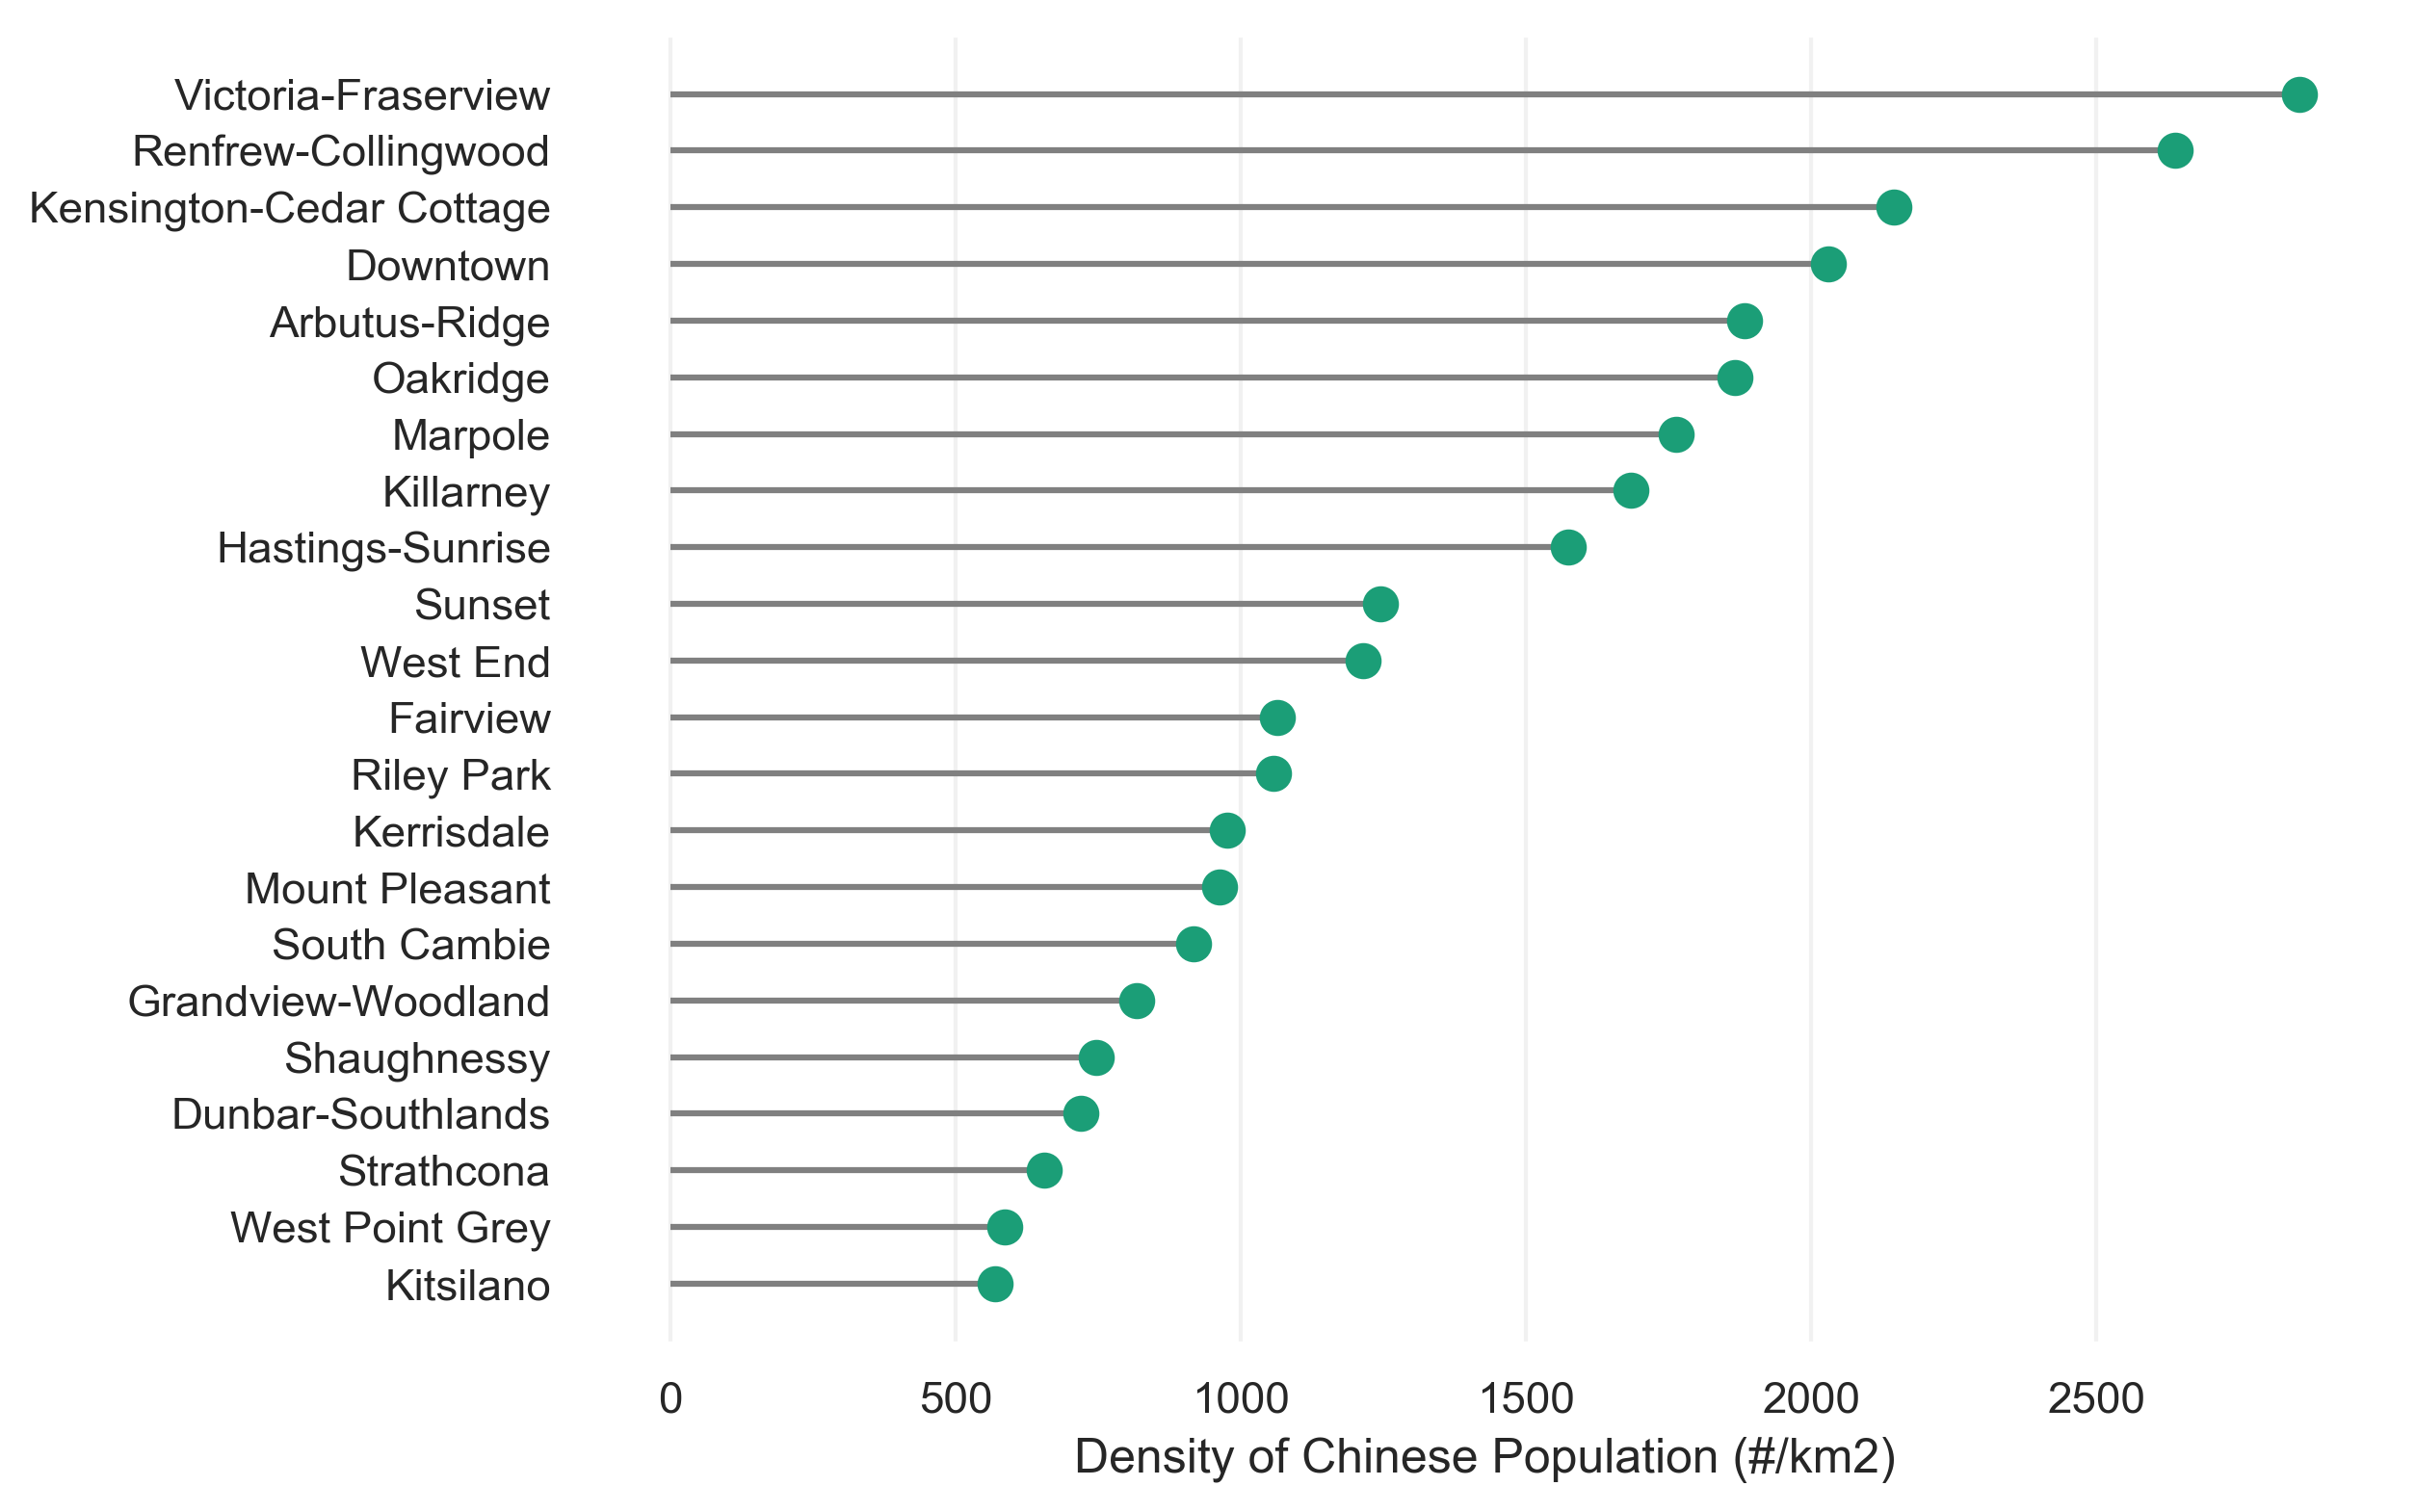

In [66]:
# plot density of chinese population
plt.figure(figsize=(8,6),dpi=300)

# reorder density of chinese population
ordered_summary = summary.sort_values(by='Density_Chinese')
my_range=range(1,len(summary.index)+1)

# lollipop
import seaborn as sns
plt.rcParams['grid.color']='#f1f1f1'
plt.rcParams['axes.facecolor']='white'
plt.hlines(y=my_range, xmin=0, xmax=ordered_summary['Density_Chinese'], color='grey')
plt.plot(ordered_summary['Density_Chinese'], my_range, 'o', color="#1B9E77", markersize=8)
plt.grid(None,axis='y')

# add titles and axis names
plt.yticks(my_range, ordered_summary['Local Area'])
plt.xlabel('Density of Chinese Population (#/km2)')

plt.savefig('density-cp.png', dpi=300, bbox_inches='tight')
plt.show()

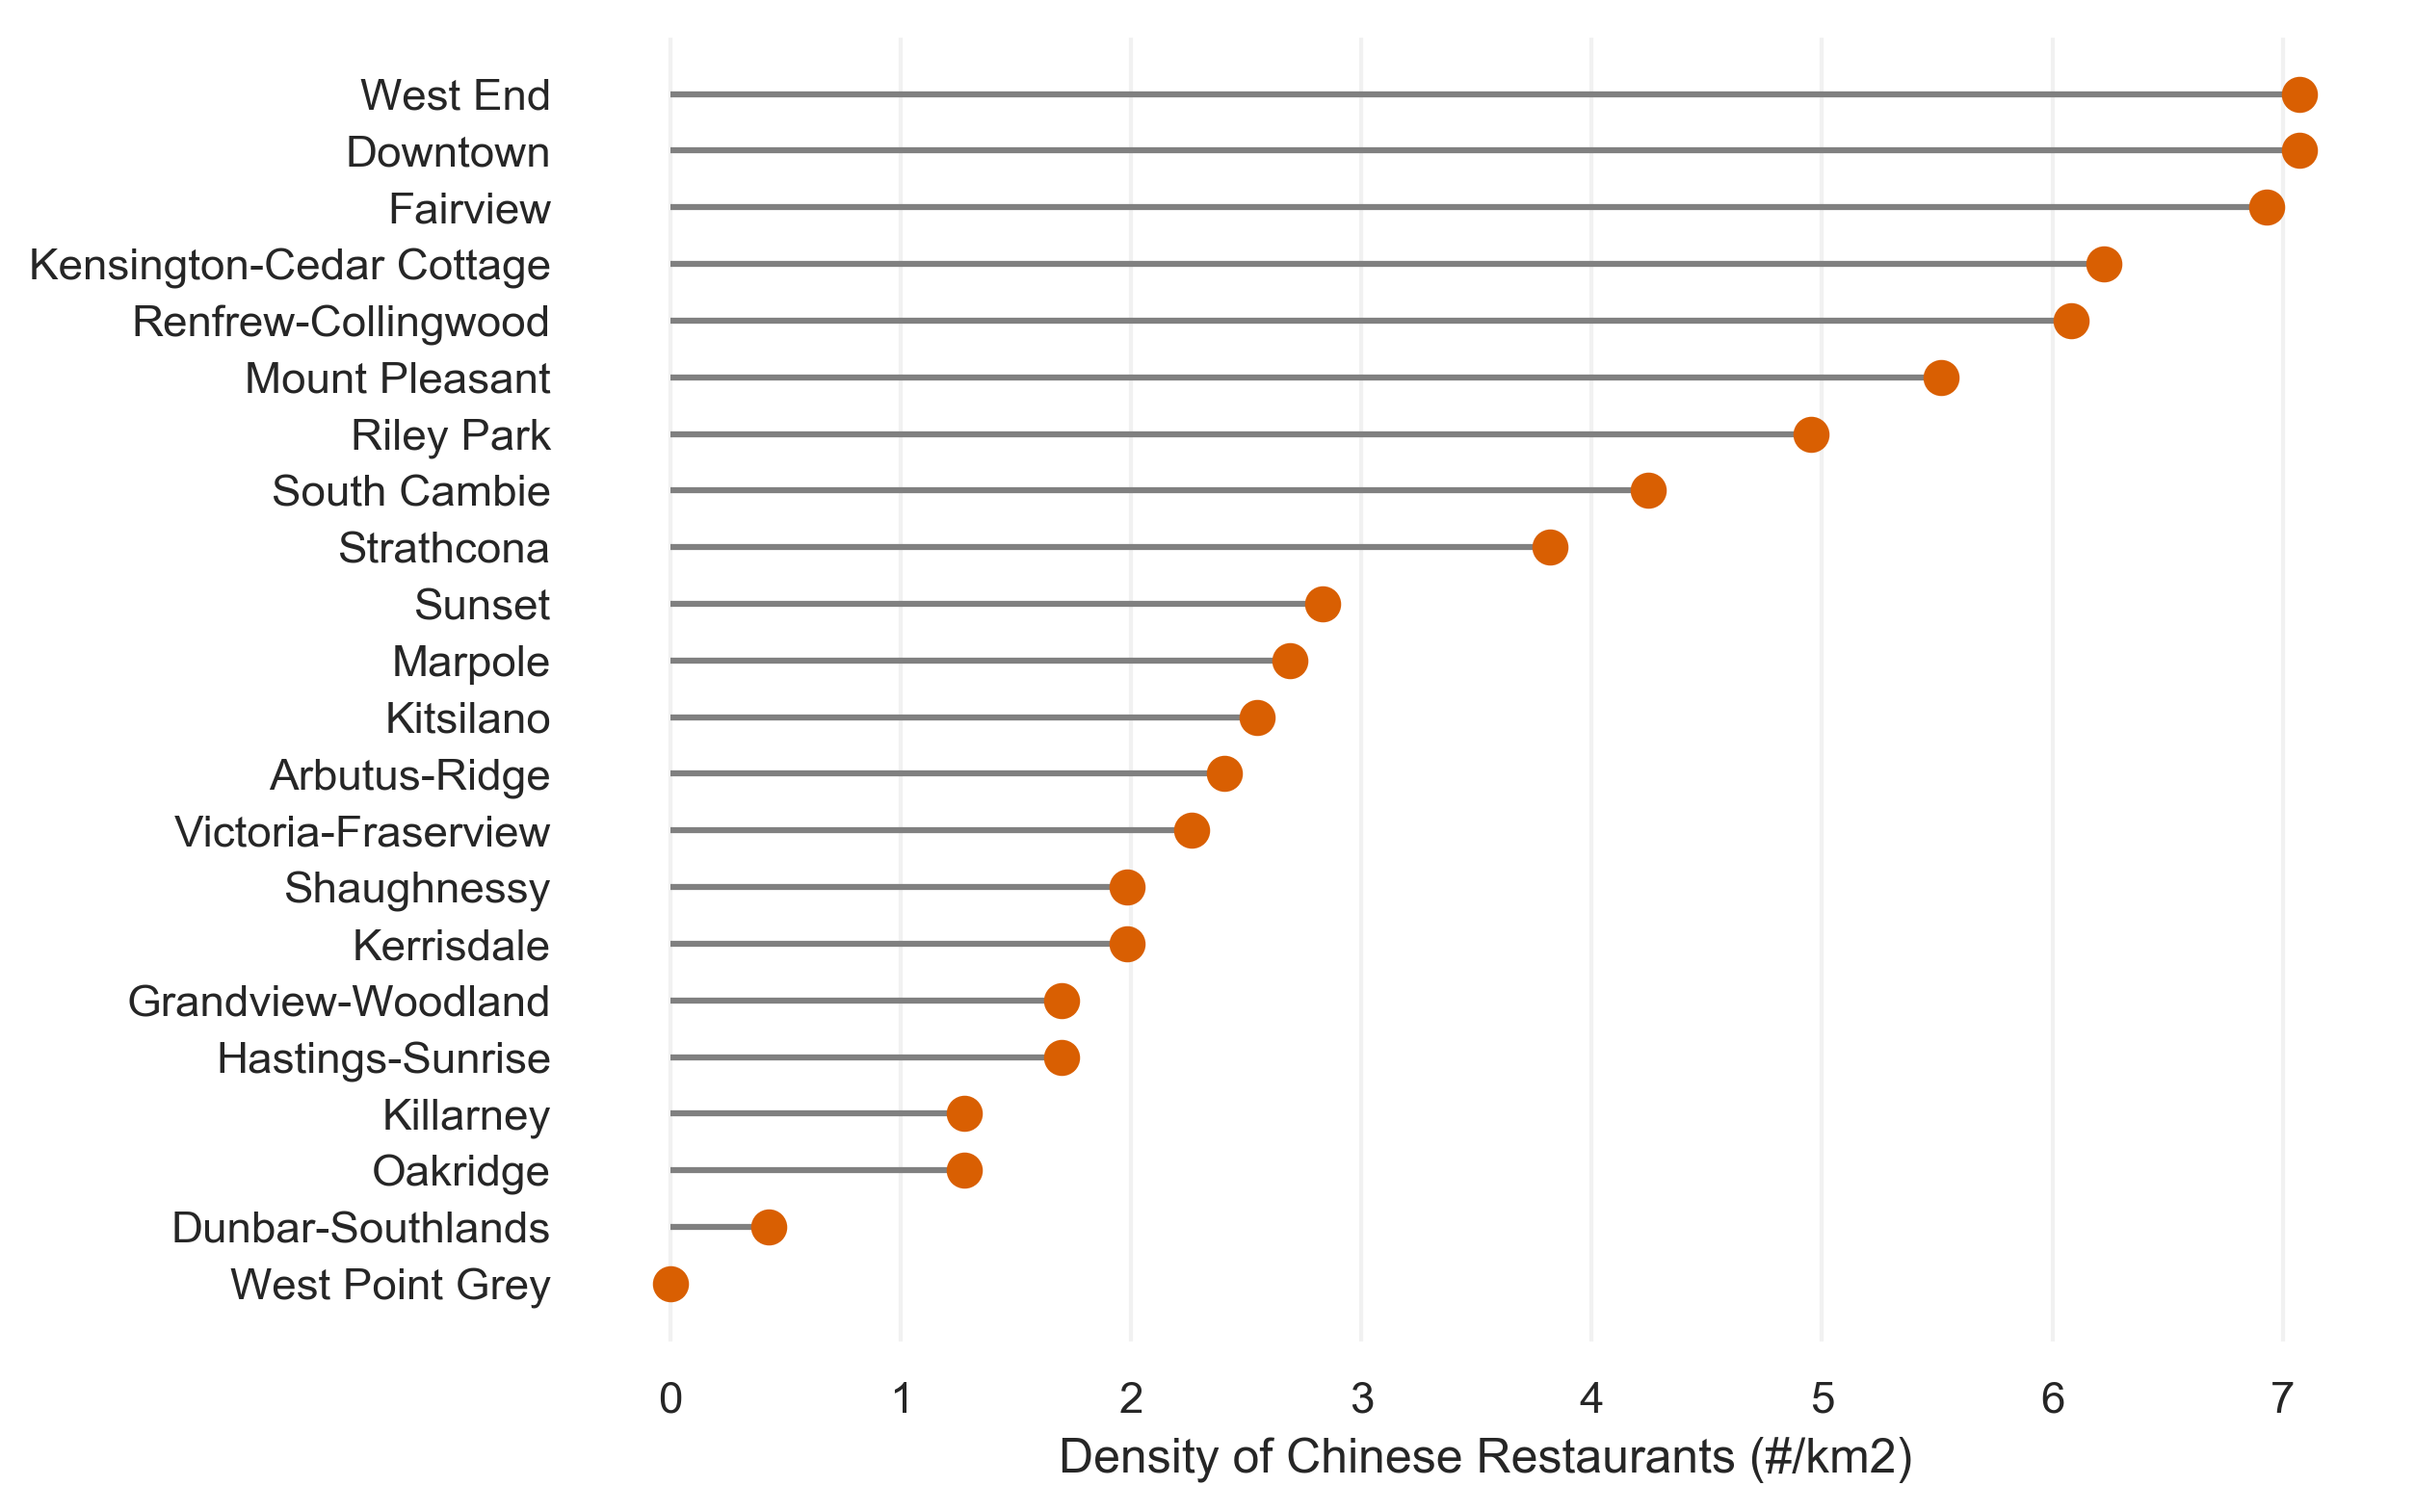

In [67]:
# plot density of chinese restaurants
plt.figure(figsize=(8,6),dpi=300)

# reorder density of chinese restaurants
ordered_summary = summary.sort_values(by='Density_CR')
my_range=range(1,len(summary.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_summary['Density_CR'], color='grey')
plt.plot(ordered_summary['Density_CR'], my_range, 'o', color='#D95F02', markersize=8)
plt.grid(None,axis='y')

# add titles and axis names
plt.yticks(my_range, ordered_summary['Local Area'])
plt.xlabel('Density of Chinese Restaurants (#/km2)')

plt.savefig('density-cr.png', dpi=300, bbox_inches='tight')
plt.show()

### Cluster Analysis

DBSCAN is a popular unsupervised clustering algorithm that is commonly used in machine learning (Ester et al., 1996). DBSCAN groups similar points that are close to each other based on a radius and a minimum number of points. Unlike K-means, DBSCAN can identify clusters of arbitrary shape and find outliers without specifying the number of clusters before the clustering process. In the study, Min-Max Normalization which gives the same importance to all variables was applied to data. DBSCAN was then used to segment and cluster local areas. To group local areas precisely and have an appropriate number of clusters, 0.2 radius was used and the minimum number of points was set to 2.  
Local area in a cluster with high density of Chinese population and low density of Chinese restaurants, indicating a lower level of competition, was considered as an optimal location to open a Chinese restaurant.  

## Results

### Optimal Location

DBSCAN clustering identified 4 clusters and 2 outliers (Renfrew-Collingwood and Victoria-Fraserview) (Fig. 9). The two outliers were assigned to cluster -1. Renfrew-Collingwood had both very high density of Chinese population and restaurants. Very high density of Chinese population and low density of Chinese restaurant in Victoria-Fraserview made it a distinct local area from other clusters.  
By contrast, Fairview and West End grouped together because of their very high density of Chinese restaurants and low density of Chinese population. Marpole, Arbutus-Ridge, Hastings-Sunrise, Killarney, and Oakridge formed a cluster with relatively high density of Chinese restaurants but relatively low density of Chinese restaurants.  
In terms of available ratings, Victoria-Fraserview ranked first in the median value and second in the mean value.

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [69]:
summary[['Density_Chinese','Density_CR']].head()

,Density_Chinese,Density_CR
0,1243.968169,2.829421
1,962.223642,5.517371
2,1056.435881,4.951487
3,2030.282296,7.073553
4,568.141185,2.546479


In [70]:
# normalize density of chinese population and restaurants using min-max scaling
data = summary[['Density_Chinese', 'Density_CR']]
scaler = MinMaxScaler()
scaler.fit(data)
normalized_data = scaler.transform(data)
normalized_data

array([[0.29538578, 0.4       ],
       [0.17224284, 0.78      ],
       [0.21342047, 0.7       ],
       [0.63906253, 1.        ],
       [0.        , 0.36      ],
       [0.06577213, 0.06      ],
       [0.17791402, 0.28      ],
       [0.57489394, 0.34      ],
       [0.00731672, 0.        ],
       [0.52235567, 0.38      ],
       [0.56692854, 0.18      ],
       [0.07751358, 0.28      ],
       [0.21636302, 0.98      ],
       [0.15233298, 0.6       ],
       [0.28246948, 1.        ],
       [0.4872809 , 0.18      ],
       [0.90474463, 0.86      ],
       [0.43989639, 0.24      ],
       [1.        , 0.32      ],
       [0.68940682, 0.88      ],
       [0.03824176, 0.54      ],
       [0.10884964, 0.24      ]])

In [71]:
# dbscan clustering
dbscan = DBSCAN(eps=0.20, min_samples = 2)
clusters = dbscan.fit_predict(normalized_data)

In [72]:
clusters

array([ 0,  0,  0,  1,  0,  0,  0,  2,  0,  2,  2,  0,  3,  0,  3,  2, -1,
        2, -1,  1,  0,  0])

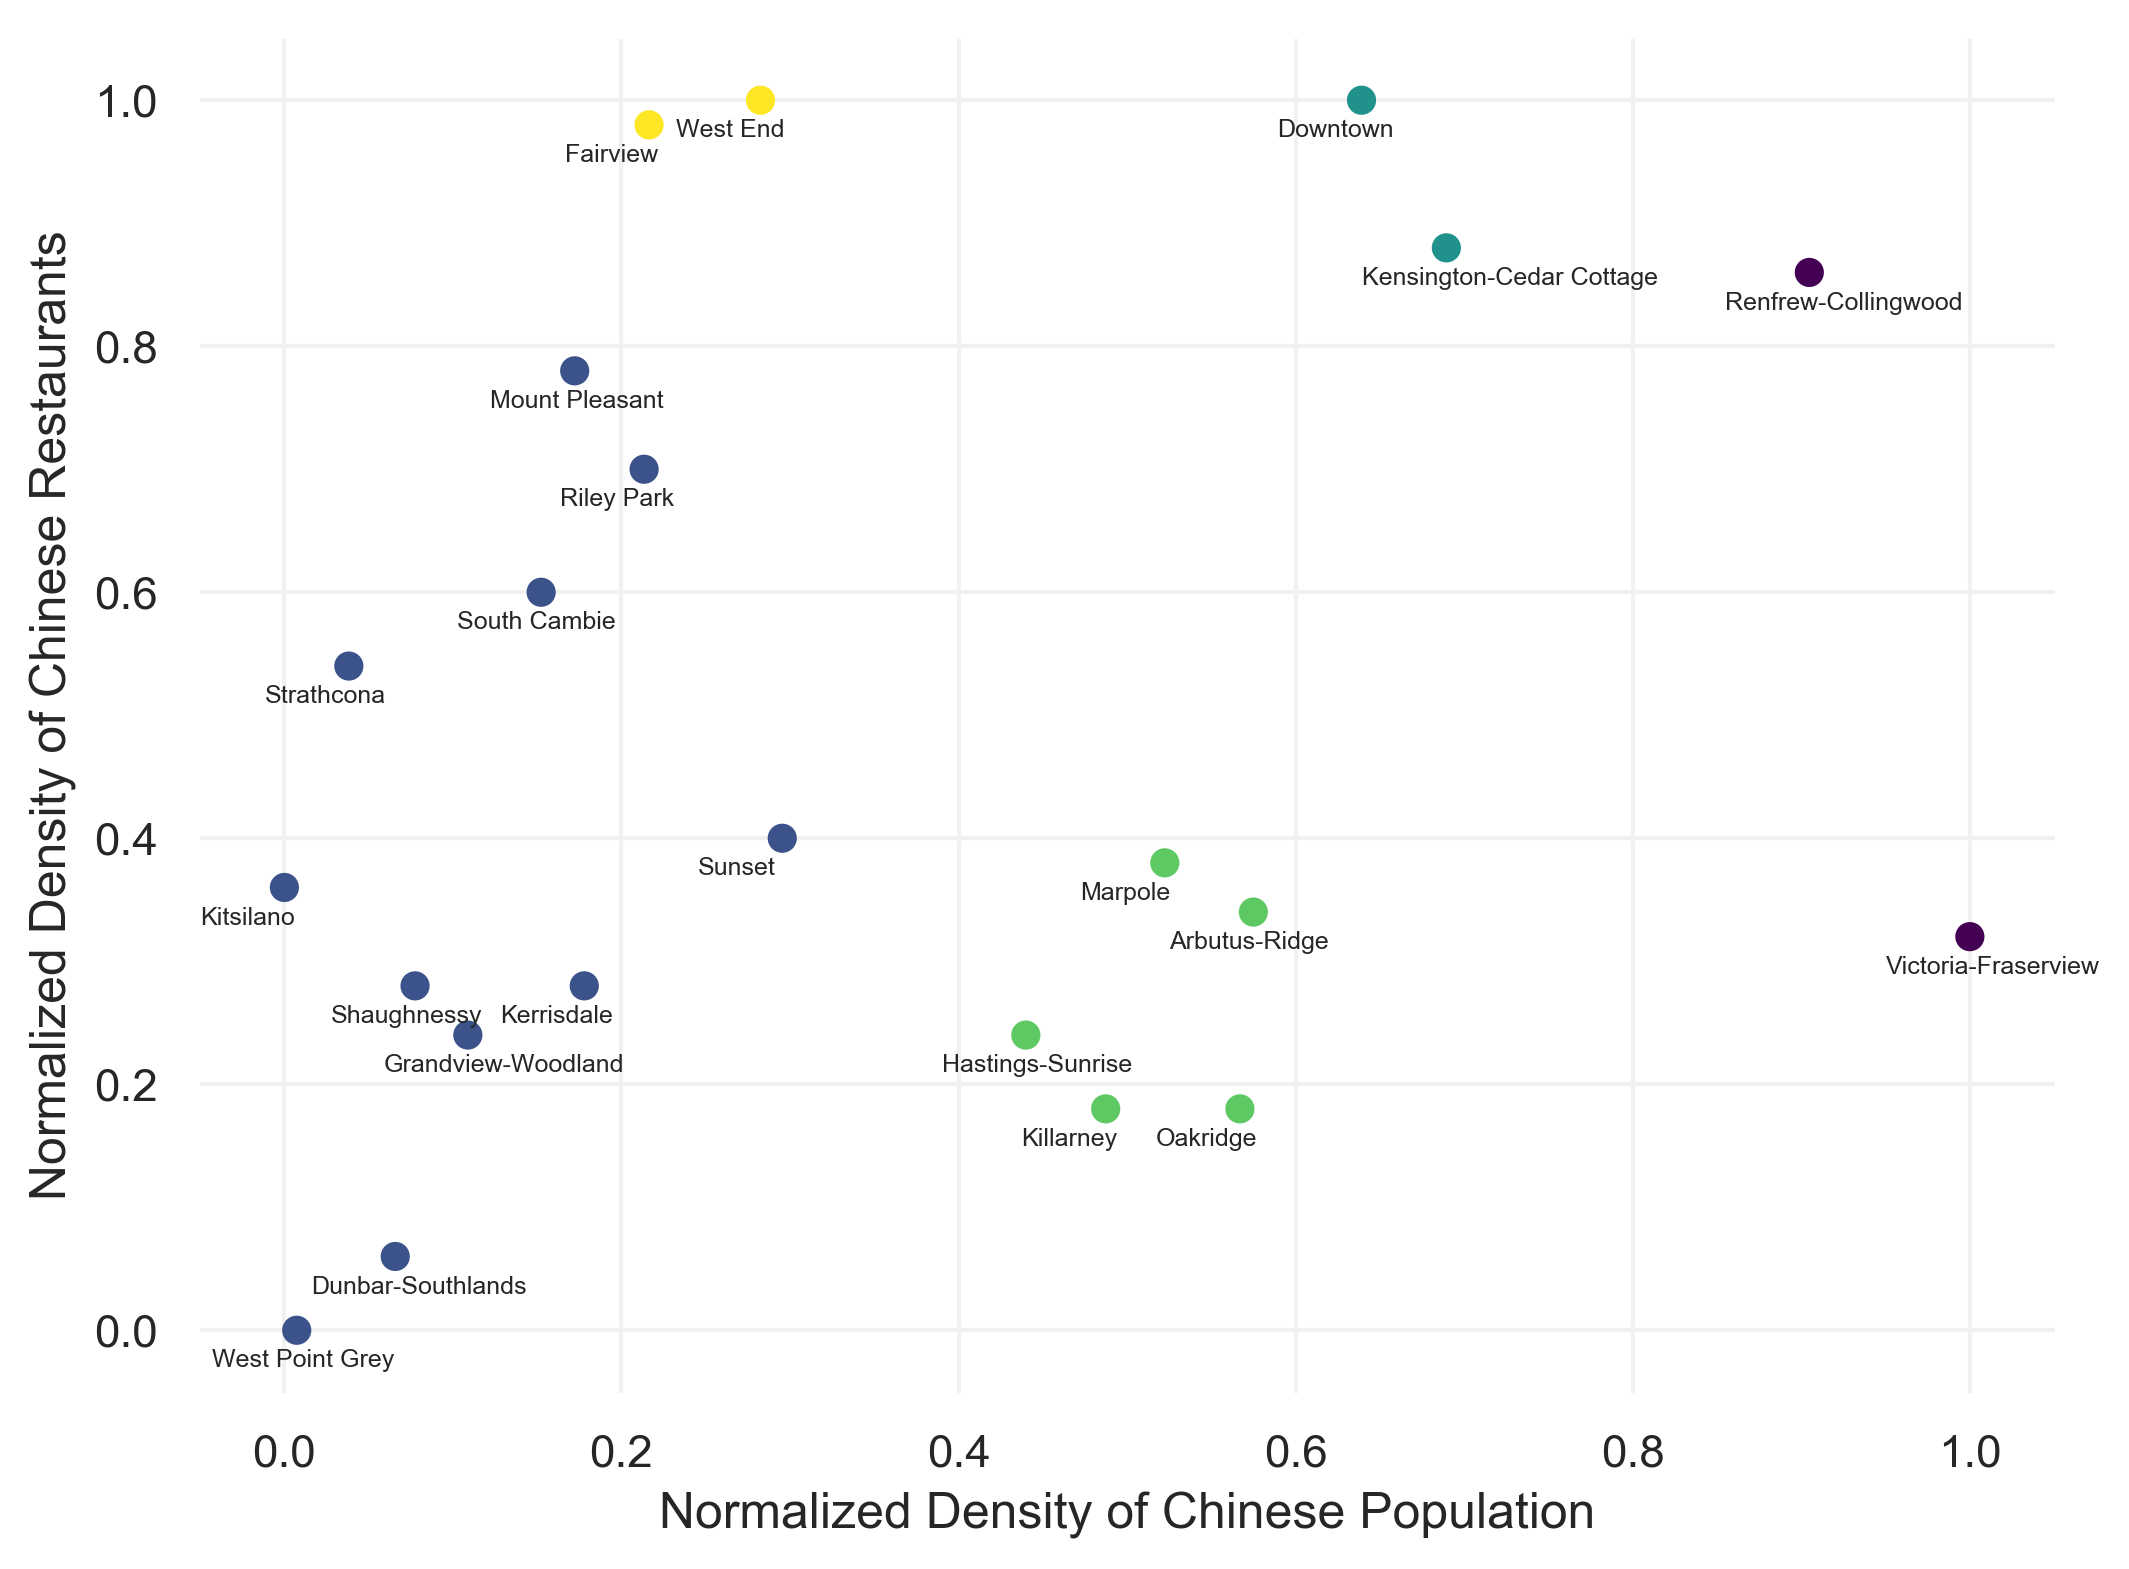

In [73]:
plt.figure(figsize=(8,6),dpi=300)
# simulating a pandas df['type'] column
types = summary['Local Area']

for i,type in enumerate(types):
    x = normalized_data[i][0]
    y = normalized_data[i][1]
    plt.text(x-0.05, y-0.03, type, fontsize=6)

# plot the cluster assignments
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap="viridis")
plt.xlabel("Normalized Density of Chinese Population")
plt.ylabel("Normalized Density of Chinese Restaurants")
plt.savefig('dbscan-scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
# check subcategory
van_cr.loc[van_cr['Local Area']=='Victoria-Fraserview', ['Venue Category','Rating']].reset_index()

,index,Venue Category,Rating
0,431,Chinese Restaurant,NaN
1,432,Chinese Restaurant,NaN
2,433,Chinese Restaurant,7.7
3,434,Chinese Restaurant,NaN
4,435,Chinese Restaurant,NaN
5,436,Chinese Restaurant,NaN
6,437,Chinese Restaurant,NaN
7,438,Chinese Restaurant,NaN
8,439,Donut Shop,7.9
9,440,Chinese Restaurant,NaN


In [75]:
# add cluster to summary df
summary['Cluster']=clusters
summary.head()

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese,Density_CR,Rating,Cluster
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169,2.829421,6.737500,0
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642,5.517371,6.672222,0
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881,4.951487,6.400000,0
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296,7.073553,6.803333,1
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185,2.546479,6.075000,0


In [76]:
# join cluster to van_cr df
boxplot_rating = pd.merge(van_cr, summary[['Local Area', 'Cluster']], on='Local Area')
boxplot_rating.head()

,Local Area,Centroid Latitude,Centroid Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Rating,Cluster
0,Sunset,49.218755,-123.092038,Yu Xiang Yuan,5158fe65e4b06ee01ae984c9,49.224628,-123.090869,Chinese Restaurant,6.1,0
1,Sunset,49.218755,-123.092038,Shoom 雅菀食府,55039916498ee7519a7e1bf9,49.224861,-123.090948,Cantonese Restaurant,7.3,0
2,Sunset,49.218755,-123.092038,Deer Garden Signatures,5075d46ee4b0c63048e3740e,49.227635,-123.090703,Chinese Restaurant,7.9,0
3,Sunset,49.218755,-123.092038,Angel Cafe 君怡餐廳,56188f36498ef927d657b7bc,49.230207,-123.090850,Cantonese Restaurant,NaN,0
4,Sunset,49.218755,-123.092038,Chu Kiang,4ce7207c9f776ea8ab055622,49.225527,-123.077495,Chinese Restaurant,NaN,0


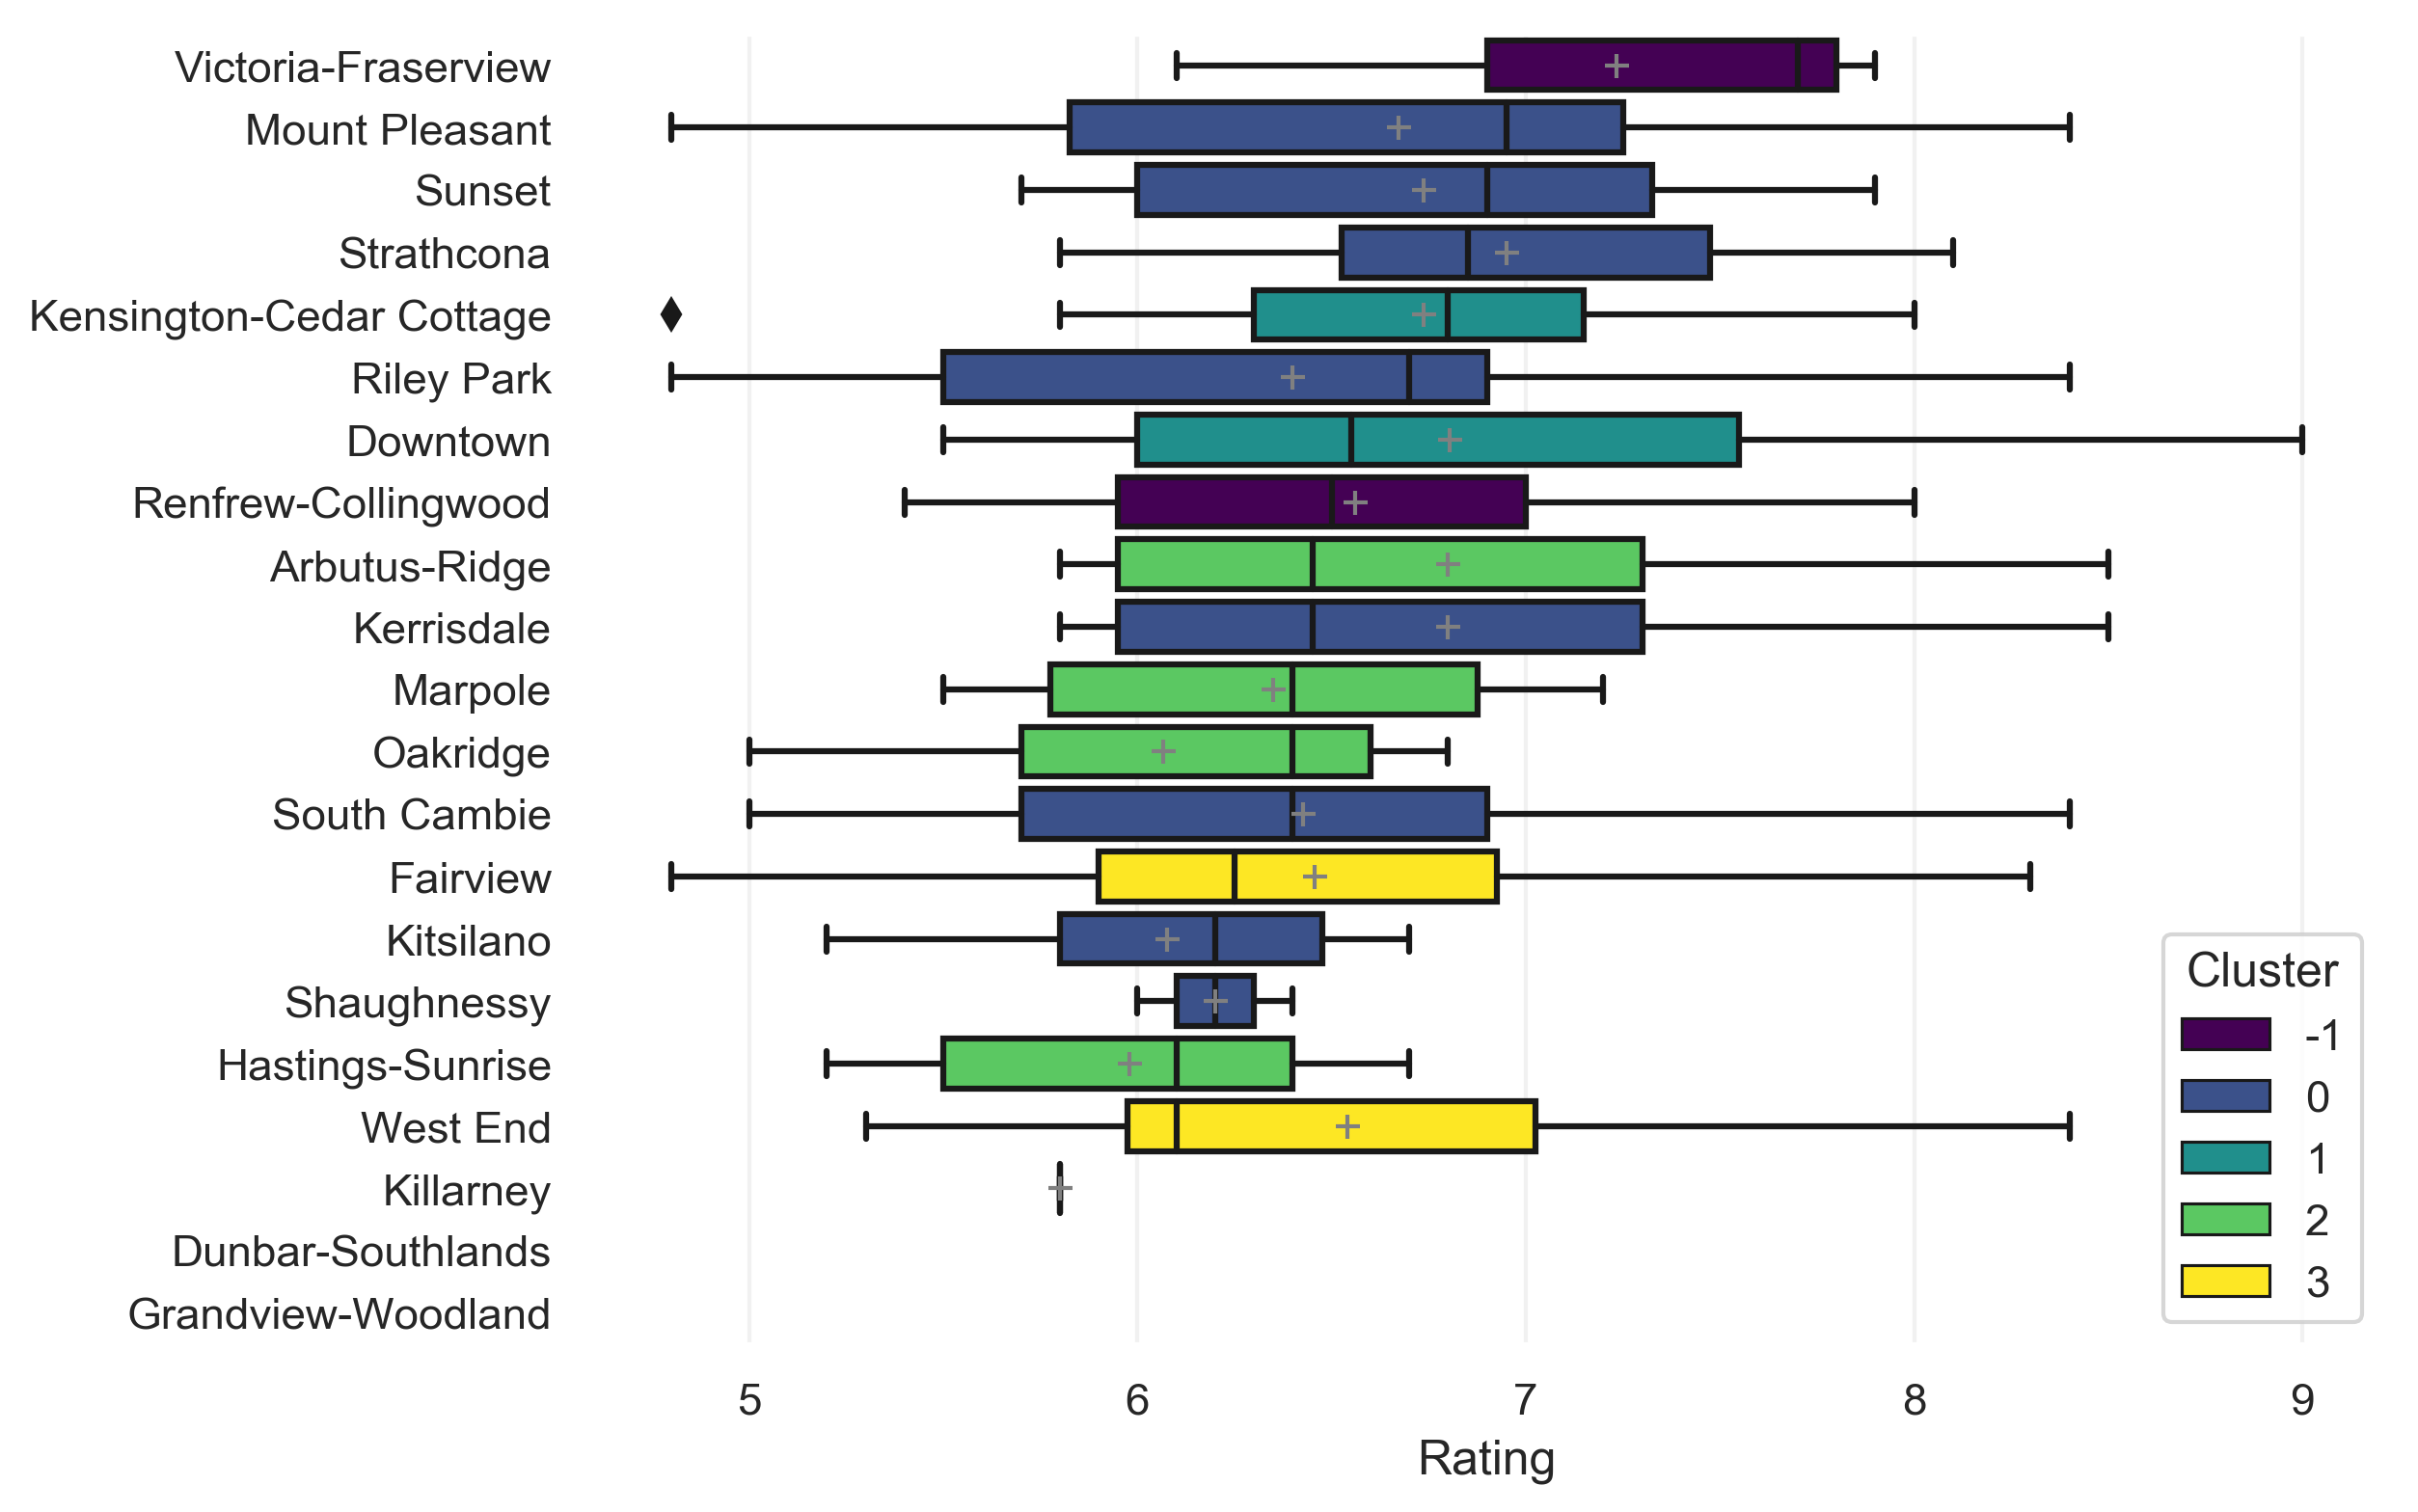

In [77]:
plt.figure(figsize=(8,6), dpi=300)

# plot ratings using grouped boxplot
sns.boxplot(x='Rating', 
            y='Local Area', 
            hue='Cluster',
            saturation=1,
            data=boxplot_rating, 
            palette=['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724'],
            order=ordered_mrating['Local Area'], 
            showmeans=True,
            meanprops={"marker":"+","markerfacecolor":"white", "markeredgecolor":"grey"},
            dodge=False
            )
plt.ylabel('')
plt.legend(title='Cluster', loc=4)
plt.savefig('cluster-boxplot.png', dpi=300, bbox_inches='tight')

In [78]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import bokeh.palettes as bp

In [79]:
# get palettes
bp.small_palettes['Viridis'][5]

['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724']

In [80]:
# generate map centred around vancouver
cluster_map = folium.Map(location=[latitude, longitude], 
                    tiles='cartodbpositron',
                    zoom_start=12) 

# map local area boundary
folium.Choropleth(geo_data=van_json,
                line_color='#66C2A5',
                line_weight=1,
                fill_opacity=0,
                fill_color='#f2f2f2').add_to(cluster_map)

# set color scheme for the clusters
colors = ['#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724']

# map clusters
markers_colors = []
for lat, lng, name, clu in zip(summary['Latitude'], summary['Longitude'], summary['Local Area'], summary['Cluster']):
    label = f'Local area: {name} Cluster: {clu}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[clu+1],
        fill=True,
        fill_color=colors[clu+1],
        fill_opacity=0.7,
        parse_html=False).add_to(cluster_map)  

# map optimal restaurant location
folium.Marker(
    [49.220011, -123.064135],
    popup='Victoria-Fraserview',
    icon=folium.Icon(color='blue', icon='thumbs-up')).add_to(cluster_map) 

# add legend
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 90px; 
                            border:none; z-index:9999; font-size:14px;
                            ">&nbsp; Cluster <br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #440154"></i> -1 &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #3B518A"></i> 0 &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #208F8C"></i> 1 &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #5BC862"></i> 2 &nbsp<br>
                              &nbsp; <i class="fa fa-circle fa-1x" style="color: #FDE724"></i> 3 &nbsp
                </div>
                ''' 
cluster_map.get_root().html.add_child(folium.Element(legend_html))

# display map
cluster_map     

In [81]:
summary

,Local Area,Latitude,Longitude,Area,Chinese,Density_Chinese,Density_CR,Rating,Cluster
0,Sunset,49.218755,-123.092038,6.575731,8180,1243.968169,2.829421,6.737500,0
1,Mount Pleasant,49.263065,-123.098513,3.720549,3580,962.223642,5.517371,6.672222,0
2,Riley Park,49.244766,-123.103147,4.931676,5210,1056.435881,4.951487,6.400000,0
3,Downtown,49.280747,-123.116567,4.674227,9490,2030.282296,7.073553,6.803333,1
4,Kitsilano,49.267540,-123.163295,6.362855,3615,568.141185,2.546479,6.075000,0
5,Dunbar-Southlands,49.237960,-123.189548,9.079848,6525,718.624330,0.424413,NaN,0
6,Kerrisdale,49.223655,-123.159576,6.608907,6445,975.199019,1.980595,6.800000,0
7,Arbutus-Ridge,49.246804,-123.161669,3.700620,6970,1883.467974,2.405008,6.800000,2
8,West Point Grey,49.268401,-123.203467,5.300219,3100,584.881449,0.000000,NaN,0
9,Marpole,49.210208,-123.128382,6.003074,10585,1763.263213,2.687950,6.350000,2


## Discussion

Based on the density of Chinese population and restaurants, I recommended Victoria-Fraserview to be an optimal location for investors to open a Chinese Restaurant in the City of Vancouver. However, the high quality of food and service is needed for the restaurant to stand out from all the rest since nearby Chinese restaurants generally have a high rating. Other than Victoria-Fraserview, Oakridge might be another good choice.  
It should be noted that the study focused on density of population and restaurants, ignoring the rent cost. This focus gave me more space to evaluate the competition in each local area. The approach and analysis was conducted for the City of Vancouver case but can have broader applicability. Although it was beyond the scope of this study, many other factors including transportation (cost and convenience), rent cost and size of parking space can affect the location selection (Tzeng et al., 2002). Residential census data used in the study was criticized for imposing a bias upon the estimation of pedestrian volume. Future study should incorporate these factors into the analysis. 

## Conclusion

Vancouver is one of the best places in North America to open a Chinese restaurant. Using location, census data, Foursquare API and DBSCAN clustering algorithm, I assessed the competition level of each local area. High density of Chinese population and low density of Chinese restaurants makes Victoria-Fraserview an optimal location to start the business. I recommended investors to select Victoria-Fraserview local area as their restaurant location because of the low competition level. Future study should incorporate other factors such as rent cost, transportation, size of parking space and pedestrian volume into the location selection analysis.

## References

City of Vancouver. (2019). *Local area boundary*. Retrieved from https://data.vancouver.ca/datacatalogue/localareaboundary.htm

Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In *Kdd* (Vol. 96, No. 34, pp. 226-231).

Foursquare. (2019). *Places API*. Retrieved from https://developer.foursquare.com/places-api

Statistics Canada. (2011). *2011 Census*. Retrieved from https://www12.statcan.gc.ca/census-recensement/2011/dp-pd/prof/index.cfm?Lang=E

Statistics Canada. (2016). *2016 Census*. Retrieved from https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E

Tzeng, G. H., Teng, M. H., Chen, J. J., & Opricovic, S. (2002). Multicriteria selection for a restaurant location in Taipei. *International journal of hospitality management*, 21(2), 171-187.